In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data read

In [76]:
df = pd.read_csv('claims_sample_data_cleared.csv')

In [77]:
df.head(3)

,Unnamed: 0,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT,CLAIM_SPECIALTY_formatted,CLAIM_SPECIALTY_final,pairednum
0,0,201801,AncillaryFFS,null_specialty,Payer F,4281,null_specialty,null_specialty,1
1,1,201801,AncillaryFFS,null_specialty,Payer H,2221,null_specialty,null_specialty,1
2,2,201801,AncillaryFFS,null_specialty,Payer O,3937,null_specialty,null_specialty,1


In [78]:
df1 = df.groupby(['MONTH']).agg({'PAID_AMOUNT':'sum'}).reset_index()

In [79]:
df1.describe()

,MONTH,PAID_AMOUNT
count,30.000000,3.000000e+01
mean,201885.900000,6.443763e+06
std,75.207002,9.802009e+05
min,201801.000000,2.913437e+06
25%,201808.250000,5.952717e+06
50%,201903.500000,6.512721e+06
75%,201910.750000,7.058377e+06
max,202006.000000,8.558681e+06


In [80]:
df1.index = pd.to_datetime(df1['MONTH'], format='%Y%m')

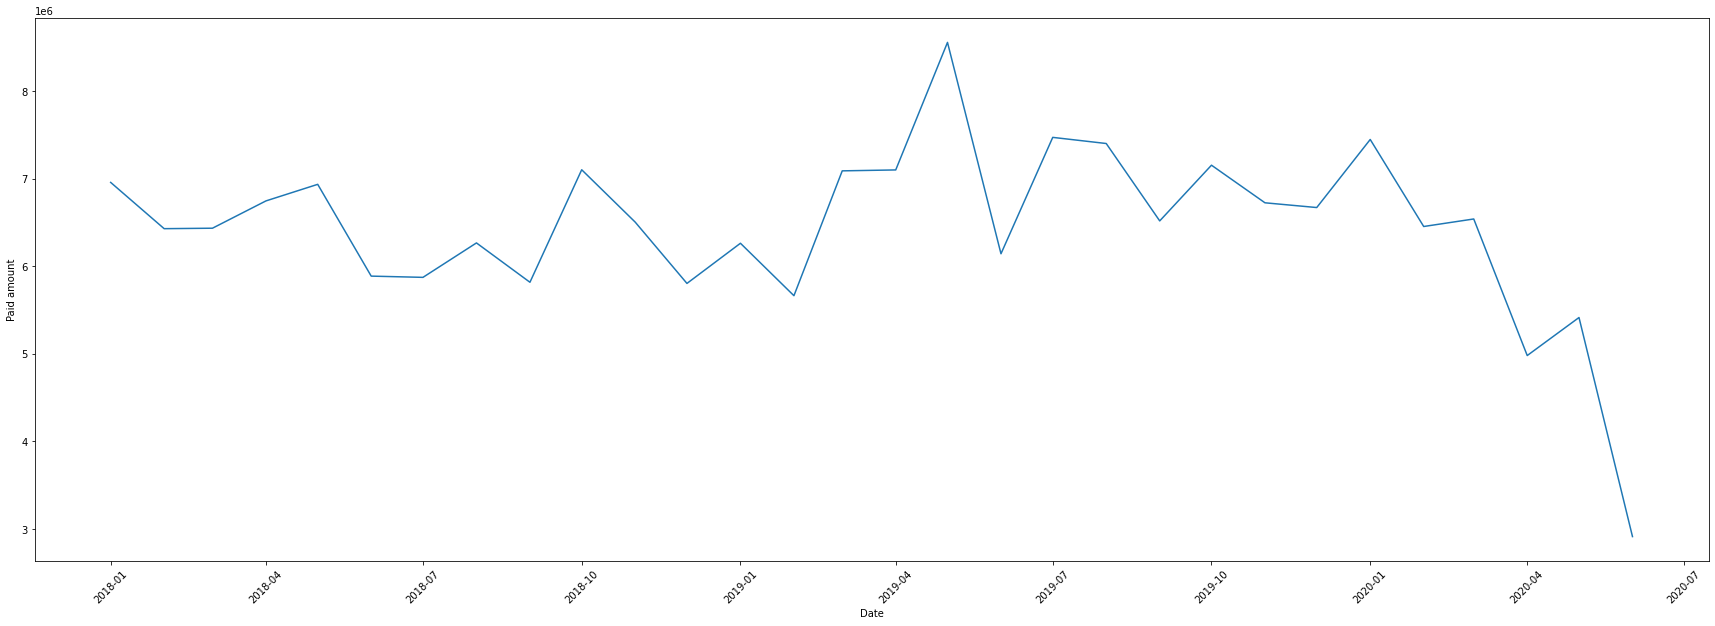

In [81]:
plt.figure(figsize=(30,10))

plt.ylabel('Paid amount')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.plot(df1.index, df1['PAID_AMOUNT'], )

# Data historical split

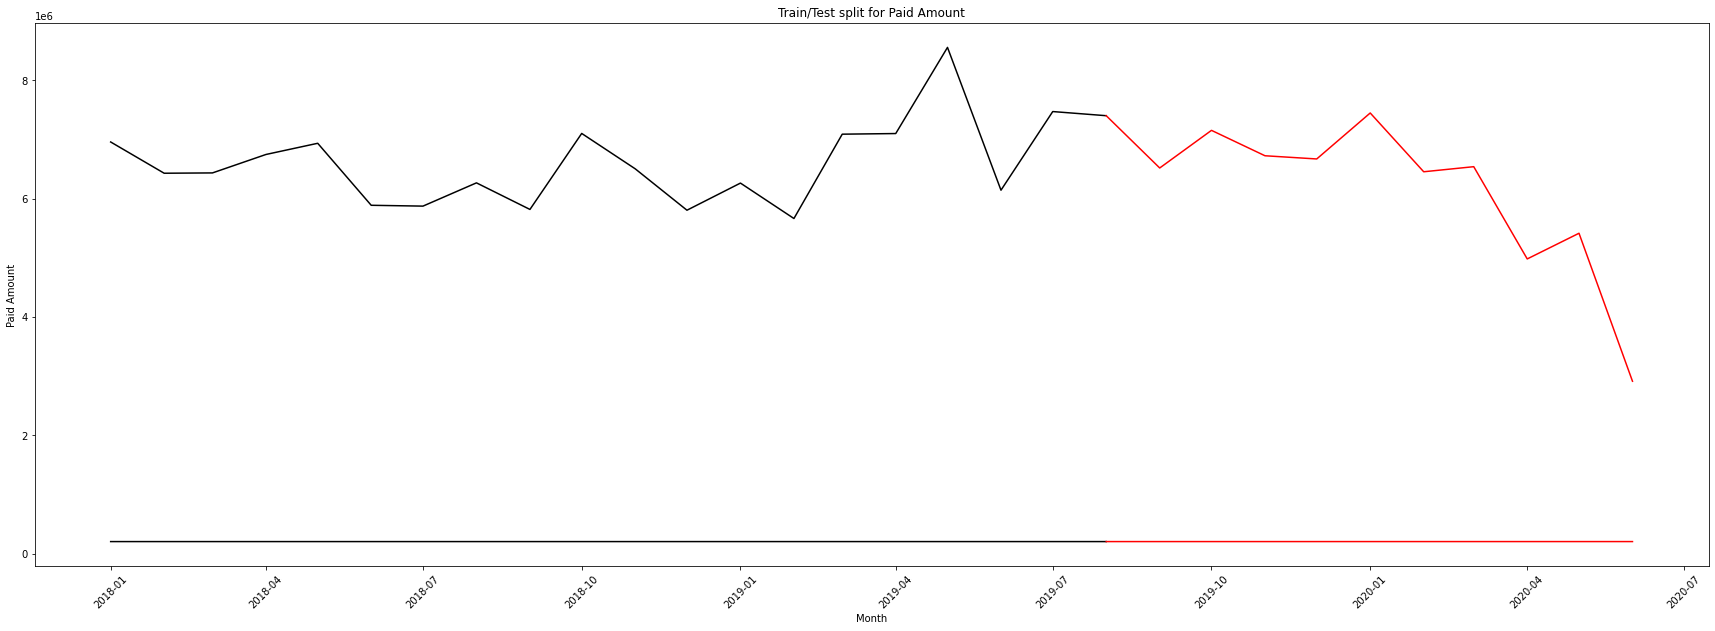

In [82]:
plt.figure(figsize=(30,10))

train = df1.iloc[0:20]
test = df1.iloc[19:]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Paid Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.title("Train/Test split for Paid Amount")
plt.show()

# ARMA model

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
y = train['PAID_AMOUNT']

In [85]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [86]:
y_pred1 = ARMAmodel.get_forecast(len(test.index))
y_pred_df1 = y_pred1.conf_int(alpha = 0.05) 
y_pred_df1["Predictions"] = ARMAmodel.predict(start = y_pred_df1.index[0], end = y_pred_df1.index[-1])
y_pred_df1.index = test.index
y_pred_out1 = y_pred_df1["Predictions"] 

In [96]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["PAID_AMOUNT"].values, y_pred_df1["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  1549648.994476389


# ARIMA

In [88]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred2 = ARIMAmodel.get_forecast(len(test.index))
y_pred_df2 = y_pred2.conf_int(alpha = 0.05) 
y_pred_df2["Predictions"] = ARIMAmodel.predict(start = y_pred_df2.index[0], end = y_pred_df2.index[-1])
y_pred_df2.index = test.index
y_pred_out2 = y_pred_df2["Predictions"] 

/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/georgiirak/opt/anaconda3/lib

In [90]:
arima_rmse = np.sqrt(mean_squared_error(test["PAID_AMOUNT"].values, y_pred_df2["Predictions"]))
print("RMSE: ",arima_rmse)

RMSE:  4201633.558407188


# SARIMAX

In [91]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred3 = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df3 = y_pred3.conf_int(alpha = 0.05) 
y_pred_df3["Predictions"] = SARIMAXmodel.predict(start = y_pred_df3.index[0], end = y_pred_df3.index[-1])
y_pred_df3.index = test.index
y_pred_out3 = y_pred_df3["Predictions"] 

/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/georgiirak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except fo

In [92]:
sarimax_rmse = np.sqrt(mean_squared_error(test["PAID_AMOUNT"].values, y_pred_df3["Predictions"]))
print("RMSE: ",sarimax_rmse)

RMSE:  625355815.5937577


# Results

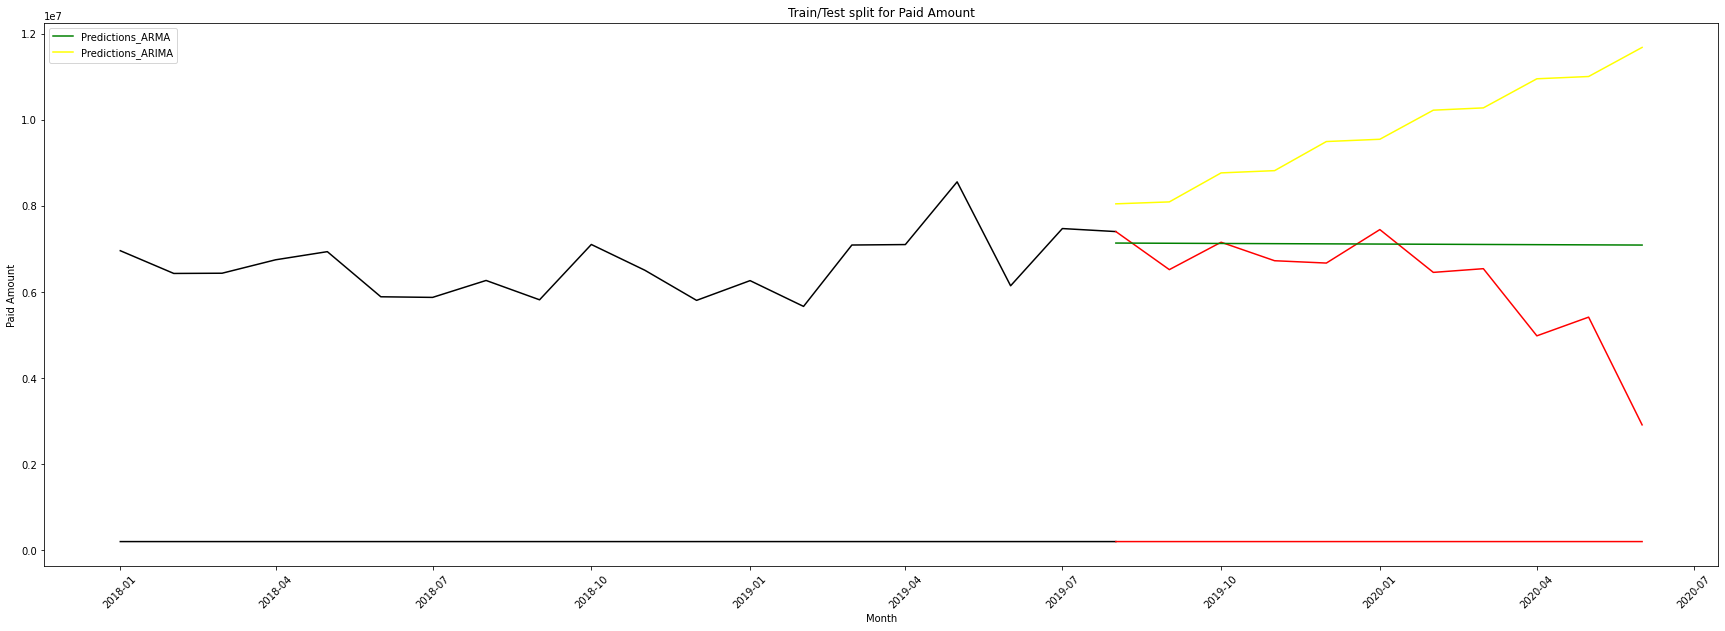

In [95]:
plt.figure(figsize=(30,10))

train = df1.iloc[0:20]
test = df1.iloc[19:]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out1, color='green', label = 'Predictions_ARMA')
plt.plot(y_pred_out2, color='yellow', label = 'Predictions_ARIMA')
plt.ylabel('Paid Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.title("Train/Test split for Paid Amount")
plt.legend()
plt.show()